In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


Finished training the model 1


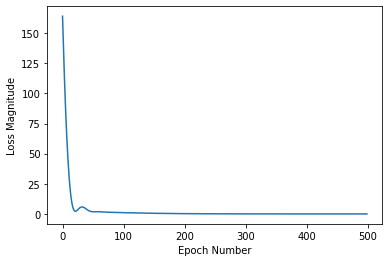

Prediction at 50: [[155.1194]]
Actual value at 50: 155.0
Weights: [array([[3.002763]], dtype=float32), array([4.9812512], dtype=float32)]
 ----------------------
 
 Finished training the model 2


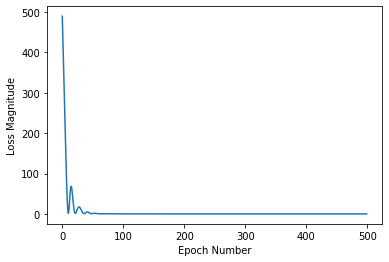

Prediction at 50 for network 2: [[154.99997]]
Actual value at 50: 155.0
Prediction at 50 for network 1: [[155.1194]]
Actual value at 50: 155.0
These are the l0 variables: [array([[-2.1225388 , -0.39915946]], dtype=float32), array([-1.9781528, -0.8578698], dtype=float32)]
These are the l1 variables: [array([[-1.3027827 ],
       [-0.58821803]], dtype=float32), array([1.9182847], dtype=float32)]
These are the l2 variables: [array([[0.6335493],
       [1.3283198]], dtype=float32), array([1.1214851], dtype=float32)]


In [ ]:
# use dense layer(s) to fit a simple linear function of the form y=mx +c, which is known a priori. Case 1. Using one node with bias, which should directly infer the weight as equivalent to the m of y =mx+c and the bias as equivalent to c.
# case 2. use two hidden layers, the first with two nodes, the second with one node. Multiplying through the weight matrices of both layers should give one value equivalent to the m of y = mx +c (which it does) and similarly the biases of layer 1 can be 
# multiplied with the weights of layer 2 and added to layer 2's bias to give a value equivalent to c. case 3. Two layers with one node each. Again, weight matrices can be multiplied through to derive m and c of the  function actually being fitted.  


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# style notes. Simple Variables and Constants and functions/procedures are written in CamelNotation. objects are written as lower_case_with_underscore.

#import logging
#logger = tf.get_logger()
#logger.setLevel(logging.ERROR)

#tf.logging.set_verbosity(tf.loggin.Error)
#

#learning a linear function - no activation functions. Demonstrates that network can learn simple numeriacal functons.

def GenerateTrainingData(min,max):
    '''GenerateTrainingData: example of use: DesignMatrix,TrainingValues= GenerateTrainingData(1,11)
    generates data points from 1 to 10 in steps of 1 and uses them to calculate dependent values using 
    the function defined in ModelFuction()'''
    DesignMatrixString=[]  # Generate as string and then convert, below, to array 
    TrainingValues=[]
    for data in range(min,max):
        DesignMatrixString.append(data)
    DesignMatrix=np.asarray(DesignMatrixString)
    TrainingValues=ModelFunction(DesignMatrix)
    return(DesignMatrix,TrainingValues)  

def ModelFunction(DesignMatrix):
    return(5.0+DesignMatrix*3.0)
    
def PlotData(data):
    plt.xlabel('Epoch Number')
    plt.ylabel("Loss Magnitude")
    plt.plot(data.history['loss'])
    plt.show()


# 1. Generate data. Generating function could be made more flexible with more argument passing but not necessary for what we are doing here.
#  currently only pass the range of the independent variables. 
DesignMatrix,TrainingValues= GenerateTrainingData(1,11)

# 2. First network: Network 1. Single layer. Should return the gradient and intercept from the generating function. 
    
    # 2a define the model definition for learning. 
    # 
    # Feature vector will be a single value
    # units defines number of neurons in the input layer. 
    # Input_shape indicates that each datapoint in the feature vector has only one descriptor. 
    # By default a bias is included. No regularization.
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
network1 = tf.keras.Sequential([l0])
network1.compile(loss='mean_squared_error',  optimizer=tf.keras.optimizers.Adam(0.1))  # put together the elements of the model. Data linked in training.

    # 2b train the model: fit to data
network1_fitting = network1.fit(DesignMatrix, TrainingValues, epochs=500, verbose=False)
print("Finished training the model 1")


# 3. Plot data 
PlotData(network1_fitting)

# 4. Test prediction.
print("Prediction at 50: {}".format(network1.predict([50])))
print("Actual value at 50: {}".format(ModelFunction(50)))
print("Weights: {}".format(l0.get_weights()))


# 5. Second network: Network 2. 3 layer. Since three layers are all linear should be equivalent to one layer
#  (i.e. can multiply the weight matrices and should give the same resulting matrix as only one layer) 
    
    # 2a define the model definition for learning. 
    # 
    # Feature vector will be a single value
    # units defines number of neurons in the input layer. 
    # Input_shape indicates that each datapoint in the feature vector has only one descriptor. 
    # By default a bias is included. No regularization.
l0 = tf.keras.layers.Dense(units=2, input_shape=[1])
l1 = tf.keras.layers.Dense(units=1)
#l2 = tf.keras.layers.Dense(units=1)
network2 = tf.keras.Sequential([l0, l1])
network2.compile(loss='mean_squared_error',  optimizer=tf.keras.optimizers.Adam(0.1))  # put together the elements of the model. Data linked in training.

    # 5b train the model: fit to data
network2_fitting = network2.fit(DesignMatrix, TrainingValues, epochs=500, verbose=False)


# 6. Plot data 
print(" ----------------------\n \n Finished training the model 2")
PlotData(network2_fitting)
print("Prediction at 50 for network 2: {}".format(network2.predict([50])))
print("Actual value at 50: {}".format(ModelFunction(50)))
print("Prediction at 50 for network 1: {}".format(network1.predict([50])))
print("Actual value at 50: {}".format(ModelFunction(50)))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

In [ ]:
# the next two commands are equivalent
print(l0.get_weights(), "\n")
print(network2.layers[0].get_weights())
print("\n --- ")
print(network2.layers[1].get_weights(),"\n --- " )

W1= np.array(network2.layers[0].get_weights()[0])  # weights for node 1
W2 = np.array(network2.layers[1].get_weights()[0])  # weights for node 2
B1 = np.array(network2.layers[0].get_weights()[1]) # Bias for node 1
B2 = np.array(network2.layers[1].get_weights()[1])  # Bias for node 2
print("w1, w2", W1, W2)

CombinedWeights = W1 @ W2
print("Combined Weights", CombinedWeights)

CombinedBias = (B1 @ W2) + B2
print("Combined Bias", CombinedBias)

[array([[-2.1225388 , -0.39915946]], dtype=float32), array([-1.9781528, -0.8578698], dtype=float32)] 

[array([[-2.1225388 , -0.39915946]], dtype=float32), array([-1.9781528, -0.8578698], dtype=float32)]

 --- 
[array([[-1.3027827 ],
       [-0.58821803]], dtype=float32), array([1.9182847], dtype=float32)] 
 --- 
w1, w2 [[-2.1225388  -0.39915946]] [[-1.3027827 ]
 [-0.58821803]]
Combined Weights [[2.9999995]]
Combined Bias [5.000002]


In [ ]:
WeightsL01 = np.array(network2.layers[0].get_weights()[0])  # equivalent to weights0 = np.array(network3.layers[0].get_weights()) ; weights00 = np.array(weights0[0]) i.e. takes the first element of get_weights, which is the weight. 
BiasL0 = np.array(network2.layers[0].get_weights()[1])     # second element returned by get_weights is the bias
WeightsL1 = np.array(network2.layers[1].get_weights()[0])
BiasL1 = np.array(network3.layers[1].get_weights()[1]) 
print("\n -------\n Weights for the first and second layer followed by their respective biases {} {} {} {}:".format(WeightsL0, WeightsL1, BiasL0, BiasL1))
CombinedWeight = WeightsL1 @ WeightsL0 
CombinedBias = (WeightsL1 @ BiasL0) + BiasL1
print(" \n Weights combined from both layers. Should be the same as the actual gradient function {}:".format(CombinedWeight))
print(" \n Bias combined across both layers. Should be the same as the actual gradient function {}: \n ---\n ".format(CombinedBias))


print(" \n Manually work through evaluation of result for input of 50.")
print("WeightsL0 @ [50] {}:".format(WeightsL0 @ [50])) 
print("WeightsL0 @ [50] + BiasL0 {}:".format(WeightsL0 @ [50] + BiasL0)) 
L0_Output = WeightsL0 @ [50] + BiasL0
print("WeightsL1 @ Layer 1 output {}:".format(WeightsL1 @ L0_Output))
print("all in one output {}".format(WeightsL1 @ L0_Output + BiasL1))
print("all in one calculation {}".format((WeightsL1 @ WeightsL0 @ [50]) + (WeightsL1 @ BiasL0) + BiasL1))
print(WeightsL1 @ WeightsL0)

Finished training the model 2


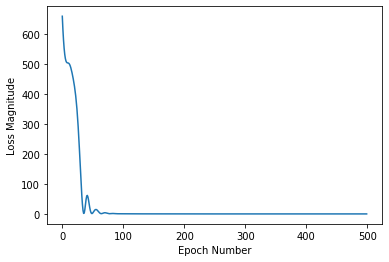

Prediction at 50: [[154.9999]]


In [ ]:
# 7. Third network: Network 3. 2 layer but only one node per layer. Since the 2 layers are all linear should be equivalent to one layer
#  (i.e. can multiply the weight matrices and should give the same resulting matrix as only one layer) 
    
    # 7a define the model definition for learning. 
    # 
    # Feature vector will be a single value
    # units defines number of neurons in the input layer. 
    # Input_shape indicates that each datapoint in the feature vector has only one descriptor. 
    # By default a bias is included. No regularization.

network3 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=[1], name="firstlayer"),
        tf.keras.layers.Dense(units=1, name="secondlayer"),
        ])
network3.compile(loss='mean_squared_error',  optimizer=tf.keras.optimizers.Adam(0.1))  # put together the elements of the model. Data linked in training.

    # 7b train the model: fit to data
network3_fitting = network3.fit(DesignMatrix, TrainingValues, epochs=500, verbose=False)
print("Finished training the model 2")

# 8. Plot data 
PlotData(network3_fitting)






In [ ]:

for layer in network3.layers:
   print("These are the {} weight and bias: {}".format(layer.name, layer.get_weights()))

#print("This is the {} weight: {}".format(network3.layers[0].name, network3.layers[0].weights))
#print("This is the {}  bias: {}".format(network3.layers[0].name, network3.layers[0].bias.numpy()))
#print("These are the {} weight and bias: {}".format(network3.layers[0].name, network3.layers[0].get_weights()))
#print("These are the {} weight and bias: {}".format(network3.layers[1].name, network3.layers[1].get_weights()))
#print("Prediction at 50: {}".format(network3.predict([50])))
#print("Actual value at 50: {}".format(ModelFunction(50)))
#print("Prediction at 200: {}".format(network3.predict([200])))
#print("Actual value at 200: {}".format(ModelFunction(200)))
#print("Prediction at 0: {}".format(network3.predict([0])))
#print("Actual value at 0: {}".format(ModelFunction(0)))






These are the firstlayer weight and bias: [array([[-1.705784]], dtype=float32), array([-0.91241753], dtype=float32)]
These are the secondlayer weight and bias: [array([[-1.7587208]], dtype=float32), array([3.3953285], dtype=float32)]


In [ ]:
# layer l0 acts as W11 + b1. layer l1 acts on the output of layer l0 such that we have W21[W11 + b1] + b2

WeightsL0 = np.array(network3.layers[0].get_weights()[0])  # equivalent to weights0 = np.array(network3.layers[0].get_weights()) ; weights00 = np.array(weights0[0]) i.e. takes the first element of get_weights, which is the weight. 
BiasL0 = np.array(network3.layers[0].get_weights()[1])     # second element returned by get_weights is the bias
WeightsL1 = np.array(network3.layers[1].get_weights()[0])
BiasL1 = np.array(network3.layers[1].get_weights()[1]) 
print("\n -------\n Weights for the first and second layer followed by their respective biases {} {} {} {}:".format(WeightsL0, WeightsL1, BiasL0, BiasL1))
CombinedWeight = WeightsL1 @ WeightsL0 
CombinedBias = (WeightsL1 @ BiasL0) + BiasL1
print(" \n Weights combined from both layers. Should be the same as the actual gradient function {}:".format(CombinedWeight))
print(" \n Bias combined across both layers. Should be the same as the actual gradient function {}: \n ---\n ".format(CombinedBias))


print(" \n Manually work through evaluation of result for input of 50.")
print("WeightsL0 @ [50] {}:".format(WeightsL0 @ [50])) 
print("WeightsL0 @ [50] + BiasL0 {}:".format(WeightsL0 @ [50] + BiasL0)) 
L0_Output = WeightsL0 @ [50] + BiasL0
print("WeightsL1 @ Layer 1 output {}:".format(WeightsL1 @ L0_Output))
print("all in one output {}".format(WeightsL1 @ L0_Output + BiasL1))
print("all in one calculation {}".format((WeightsL1 @ WeightsL0 @ [50]) + (WeightsL1 @ BiasL0) + BiasL1))
print(WeightsL1 @ WeightsL0)








 -------
 Weights for the first and second layer followed by their respective biases [[-1.705784]] [[-1.7587208]] [-0.91241753] [3.3953285]:
 
 Weights combined from both layers. Should be the same as the actual gradient function [[2.9999976]]:
 
 Bias combined across both layers. Should be the same as the actual gradient function [5.000016]: 
 ---
 
 
 Manually work through evaluation of result for input of 50.
WeightsL0 @ [50] [-85.28919816]:
WeightsL0 @ [50] + BiasL0 [-86.20161569]:
WeightsL1 @ Layer 1 output [151.60457068]:
all in one output [154.9998992]
all in one calculation [154.999897]
[[2.9999976]]


In [ ]:
network3.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firstlayer (Dense)          (None, 1)                 2         
                                                                 
 secondlayer (Dense)         (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
const model = tf.sequential({
 layers: [
   tf.layers.dense({inputShape: [784], units: 32, activation: 'relu'}),
   tf.layers.dense({units: 10, activation: 'softmax'}),
 ]
});